# <b> Student Performance Analysis

## Step 1.1: Load and Preview the Dataset

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Show the first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##  Step 1.2: Check Shape and Basic Info

In [33]:
# Dataset shape
print("Dataset shape:", df.shape)

# Dataset info
df.info()


Dataset shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Step 1.3: Basic Statistics of Numerical Columns

In [7]:
# Summary statistics
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Step 1.4: Check for Missing Values

In [8]:
# Missing values
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## <b> Step 2: Data Preprocessing

In [9]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [10]:
# Rename columns for simplicity
df.columns = df.columns.str.replace(' ', '_')

In [11]:
# Create new feature: average score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)


In [12]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


## <b> Step 3: Exploratory Data Analysis (EDA)

## 3.1 Histogram for Each Subject Score

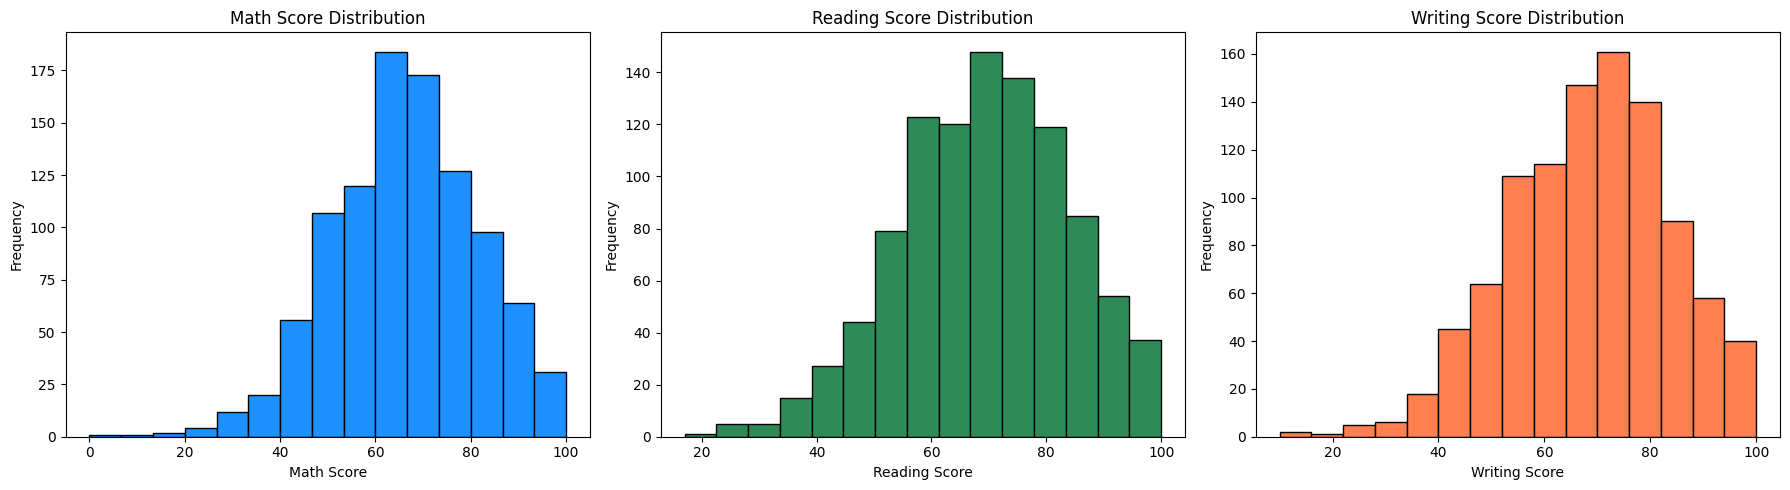

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df['math_score'], bins=15, color='dodgerblue', edgecolor='black')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['reading_score'], bins=15, color='seagreen', edgecolor='black')
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['writing_score'], bins=15, color='coral', edgecolor='black')
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##  3.2 Bar Chart: Average Score by Gender

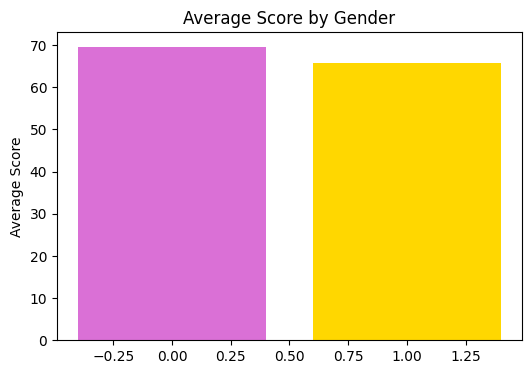

In [14]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
avg_gender = df.groupby('gender')['average_score'].mean()

plt.figure(figsize=(6, 4))
colors = ['orchid', 'gold']
plt.bar(avg_gender.index, avg_gender.values, color=colors)
plt.title('Average Score by Gender')
plt.ylabel('Average Score')
plt.show()


##  3.3 Box Plot: Score by Parental Education


/tmp/ipython-input-2513593541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='average_score', data=df, palette='Set2')


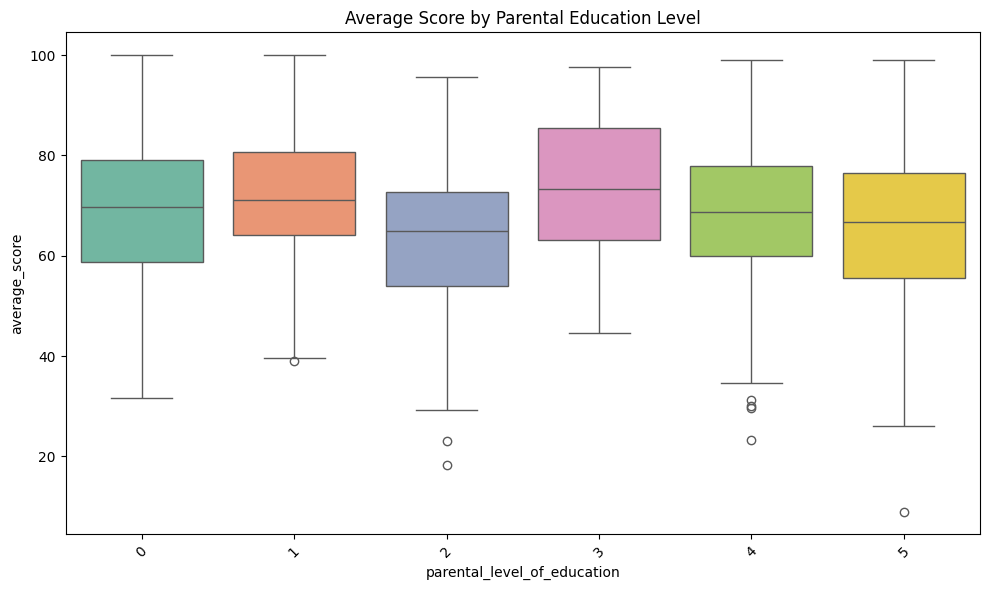

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='average_score', data=df, palette='Set2')
plt.title('Average Score by Parental Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  3.4 Scatter Plot: Math Score vs Writing Score

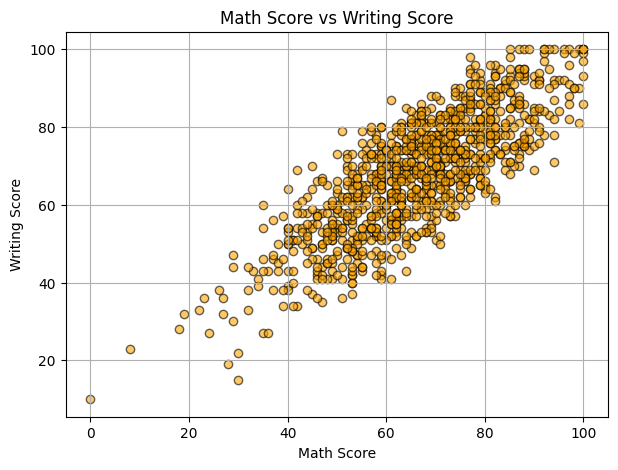

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(df['math_score'], df['writing_score'], alpha=0.6, color='orange', edgecolor='black')
plt.title('Math Score vs Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.grid(True)
plt.show()


## 3.5 Correlation Heatmap

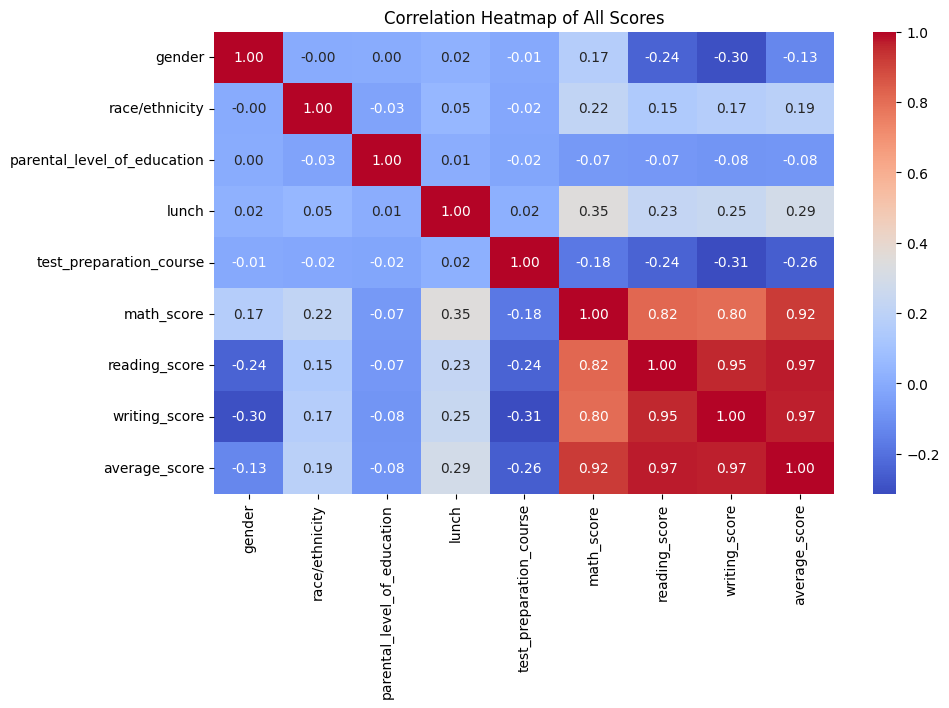

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Scores')
plt.show()


## 3.6 Pie Chart – Test Preparation Course

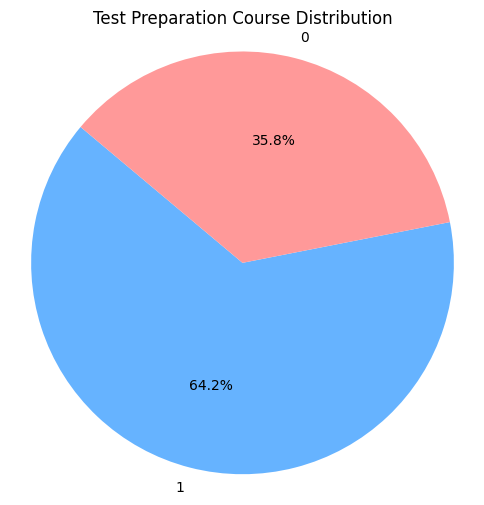

In [18]:
prep_counts = df['test_preparation_course'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(prep_counts, labels=prep_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title('Test Preparation Course Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


## 3.7 Count Plot – Race/Ethnicity Categories

/tmp/ipython-input-1010017044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race/ethnicity', data=df, palette='pastel')


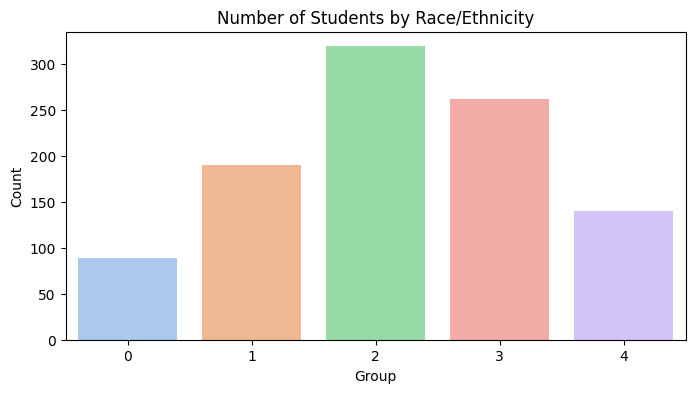

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(x='race/ethnicity', data=df, palette='pastel')
plt.title('Number of Students by Race/Ethnicity')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()


##  Violin Plot – Reading Score by Gender

/tmp/ipython-input-1039520212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='reading_score', data=df, palette='Set3')


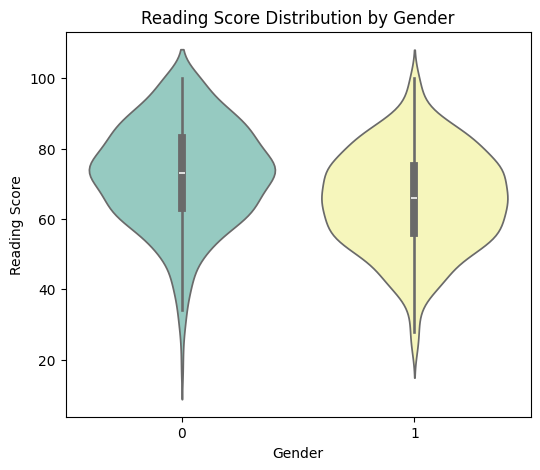

In [20]:
plt.figure(figsize=(6, 5))
sns.violinplot(x='gender', y='reading_score', data=df, palette='Set3')
plt.title('Reading Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()


## Line Chart – Sorted Average Scores

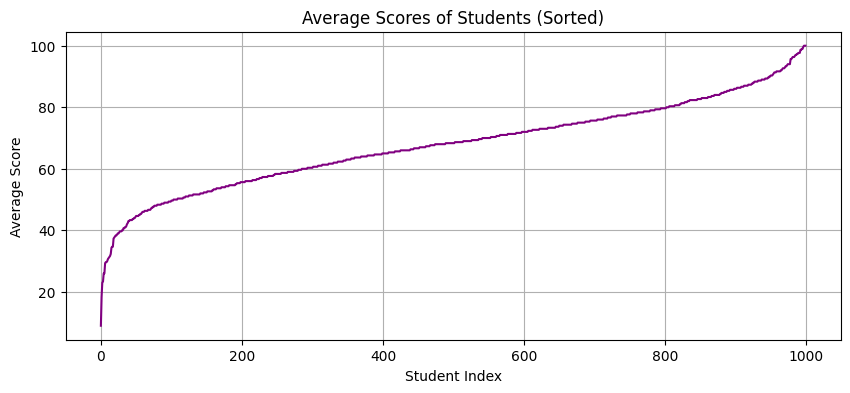

In [21]:
sorted_scores = df.sort_values('average_score').reset_index()

plt.figure(figsize=(10, 4))
plt.plot(sorted_scores['average_score'], color='purple')
plt.title('Average Scores of Students (Sorted)')
plt.xlabel('Student Index')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


## <b> Step 4: Model Building & Evaluation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


## 4.1 Prepare Features and Target

In [23]:
# Define input features (excluding individual scores to avoid data leakage)
features = df.drop(columns=['math_score', 'reading_score', 'writing_score', 'average_score'])
target = df['average_score']

# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## 4.2 Linear Regression

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print(" Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


 Linear Regression:
R² Score: 0.1255652122569746
MAE: 10.717163335369497
RMSE: 13.691222853433064


## 4.3 Random Forest Regressor

In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print(" Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Random Forest Regressor:
R² Score: -0.028607182521283248
MAE: 11.540116695530077
RMSE: 14.849208401991024


## 4.4 Visualize Predictions vs Actual

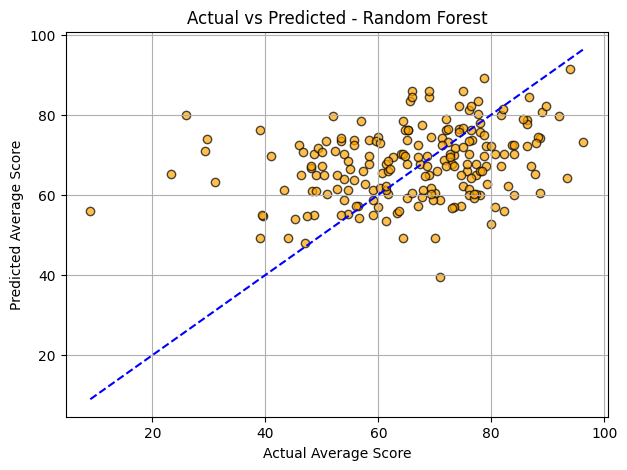

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, color='orange', edgecolor='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.title('Actual vs Predicted - Random Forest')
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.grid(True)
plt.show()


## <b> Step 5: Classification Model – Predicting Pass or Fail

In [27]:
# Create a binary column: 1 if average_score >= 50 else 0
df['pass_fail'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['math_score', 'reading_score', 'writing_score', 'average_score', 'pass_fail'])
y = df['pass_fail']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5.1 Logistic Regression

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


 Logistic Regression:
Accuracy: 0.865
Confusion Matrix:
 [[  0  27]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5.2 Random Forest Classifier

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(" Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Classifier:
Accuracy: 0.855
Confusion Matrix:
 [[  0  27]
 [  2 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.85       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.75      0.85      0.80       200



## Plot Confusion Matrix

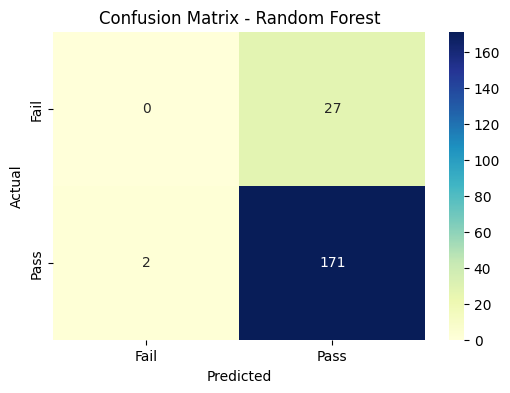

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
